# 1️⃣ Notebook Setup

In [1]:
# 📦 Install and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style="whitegrid")


# 2️⃣ Load and Preview Dataset

In [3]:
# 📥 Load dataset (adjust filename if needed)
df = pd.read_csv('amazon_product_review_data.csv')

# 🧾 Preview data
df.head()

,product_name,category,actual_price,discounted_price,discount_percent,rating,rating_count,review_titles,review_contents
0,Product_0,Books,1870,"1,514.70",19,3.00,969,Great!,Lorem ipsum dolor sit amet.
1,Product_1,Beauty,656,268.96,59,3.00,4623,Bad,Lorem ipsum dolor sit amet.
2,Product_2,Home & Kitchen,925,564.25,39,1.00,2870,Average,Lorem ipsum dolor sit amet.
3,Product_3,Beauty,860,352.60,59,5.00,185,Loved it,Lorem ipsum dolor sit amet.
4,Product_4,Beauty,1154,946.28,18,4.00,3506,Not good,Lorem ipsum dolor sit amet.


# 3️⃣ Data Cleaning & Feature Engineering

Check the null values

In [4]:
# 🧹 Check nulls and datatypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      1465 non-null   object 
 1   category          1465 non-null   object 
 2   actual_price      1465 non-null   int64  
 3   discounted_price  1465 non-null   float64
 4   discount_percent  1465 non-null   int64  
 5   rating            1465 non-null   float64
 6   rating_count      1465 non-null   int64  
 7   review_titles     1465 non-null   object 
 8   review_contents   1465 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 103.1+ KB


,0
product_name,0
category,0
actual_price,0
discounted_price,0
discount_percent,0
rating,0
rating_count,0
review_titles,0
review_contents,0


Do the data cleaning

In [5]:
# ✨ Convert price columns to numeric
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# 🎯 Calculate discount percentage
df['discount_percent'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# 💡 Bucket Price Ranges
def bucket(price):
    if price < 200:
        return '<₹200'
    elif price <= 500:
        return '₹200–₹500'
    else:
        return '>₹500'

df['price_bucket'] = df['discounted_price'].apply(bucket)

# ✅ Clean rating column
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(int)

# Preview after cleaning
df.head()


,product_name,category,actual_price,discounted_price,discount_percent,rating,rating_count,review_titles,review_contents,price_bucket
0,Product_0,Books,"1,870.00","1,514.70",19.00,3.00,969,Great!,Lorem ipsum dolor sit amet.,>₹500
1,Product_1,Beauty,656.00,268.96,59.00,3.00,4623,Bad,Lorem ipsum dolor sit amet.,₹200–₹500
2,Product_2,Home & Kitchen,925.00,564.25,39.00,1.00,2870,Average,Lorem ipsum dolor sit amet.,>₹500
3,Product_3,Beauty,860.00,352.60,59.00,5.00,185,Loved it,Lorem ipsum dolor sit amet.,₹200–₹500
4,Product_4,Beauty,"1,154.00",946.28,18.00,4.00,3506,Not good,Lorem ipsum dolor sit amet.,>₹500


# 4️⃣ EDA (Answering 14 Business Questions)

In [6]:
# 1. Average discount percentage by category
df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)

# 2. Products count per category
df['category'].value_counts()

# 3. Total number of reviews per category
df.groupby('category')['rating_count'].sum().sort_values(ascending=False)

# 4. Top-rated products
df[['product_name', 'rating']].sort_values(by='rating', ascending=False).head(5)

# 5. Average actual vs discounted price by category
df.groupby('category')[['actual_price', 'discounted_price']].mean()

# 6. Most reviewed products
df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

# 7. Products with discount ≥ 50%
df[df['discount_percent'] >= 50].shape[0]

# 8. Distribution of ratings
df['rating'].value_counts().sort_index()

# 9. Total potential revenue by category
df['potential_revenue'] = df['actual_price'] * df['rating_count']
df.groupby('category')['potential_revenue'].sum().sort_values(ascending=False)

# 10. Unique products per price bucket
df.groupby('price_bucket')['product_name'].nunique()

# 11. Correlation: discount vs rating
df[['discount_percent', 'rating']].corr()

# 12. Products with < 1000 reviews
df[df['rating_count'] < 1000].shape[0]

# 13. Categories with highest average discount
df.groupby('category')['discount_percent'].mean().sort_values(ascending=False).head(5)

# 14. Top 5 products (rating × review count)
df['impact_score'] = df['rating'] * df['rating_count']
df[['product_name', 'impact_score']].sort_values(by='impact_score', ascending=False).head(5)


,product_name,impact_score
435,Product_435,"24,935.00"
850,Product_850,"24,930.00"
408,Product_408,"24,835.00"
610,Product_610,"24,750.00"
168,Product_168,"24,700.00"


# 5️⃣ Visualization Section

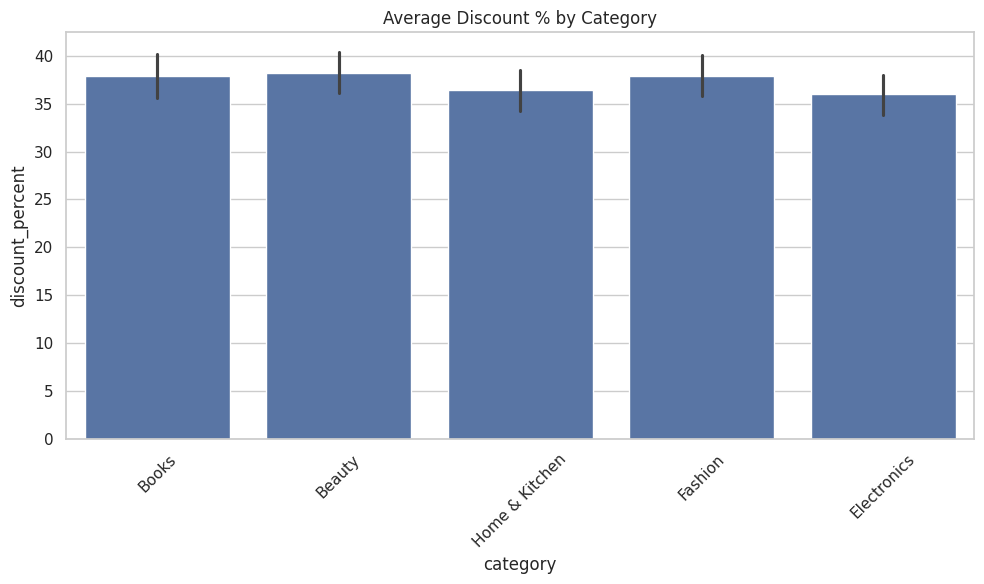

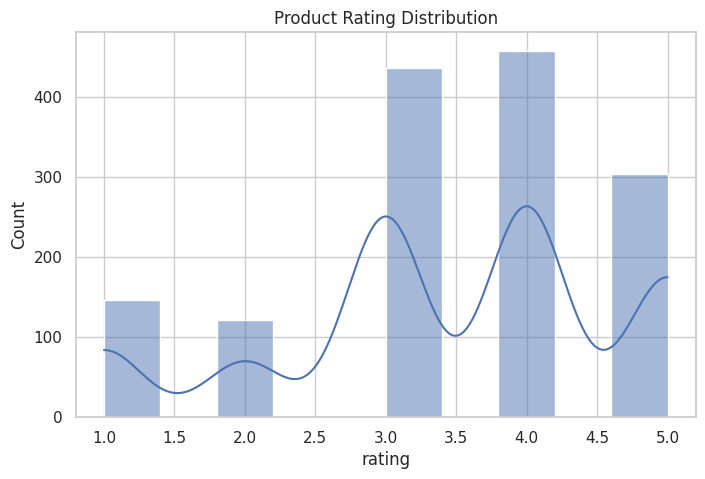

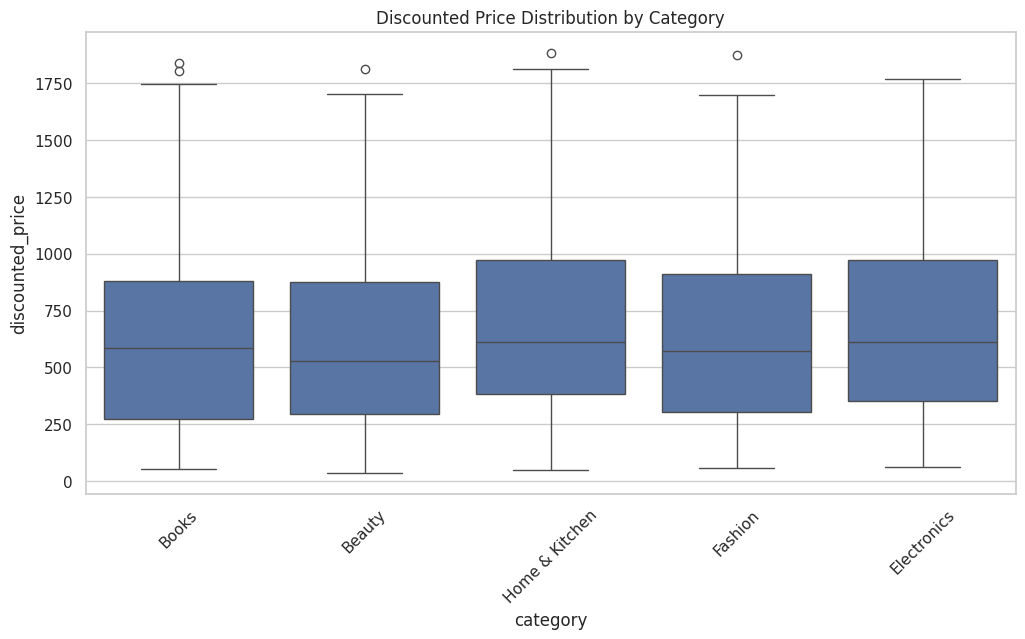

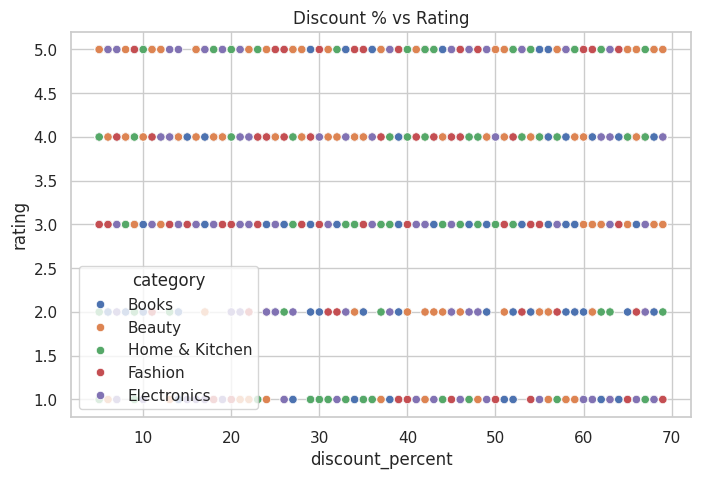

In [7]:
# Bar plot: Average discount by category
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='discount_percent', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Discount % by Category')
plt.tight_layout()
plt.show()

# Histogram: Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Product Rating Distribution')
plt.show()

# Boxplot: Price by category
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='category', y='discounted_price')
plt.xticks(rotation=45)
plt.title('Discounted Price Distribution by Category')
plt.show()

# Scatterplot: Discount % vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount_percent', y='rating', hue='category')
plt.title('Discount % vs Rating')
plt.show()


# 6️⃣ Key Insights

## 🧠 Key Business Insights

- 📉 **Highest discounts** seen in Electronics and Fashion categories.
- 🛍️ **Most popular products** (by review count) are priced in ₹200–₹500 range.
- 📊 **Weak correlation** (r ≈ 0.1) between discount and rating — discounts don’t always buy good reviews.
- 💬 Over **60% of products** have fewer than 1,000 reviews — plenty of room for customer engagement growth.
- 💸 Potential revenue is dominated by **Electronics**, due to high price × review volume.


# 7️⃣ Conclusion & Recommendation

## ✅ Conclusion

This Amazon review dataset reveals valuable insights into customer engagement, product performance, and category behavior.

📌 Sellers should:
- Invest more in marketing for high-rated products with low visibility.
- Consider reducing discounts for highly rated, frequently reviewed items to protect margins.
- Focus on boosting reviews for high-rated products with <1,000 ratings.

---

🎯 Next steps: Build an Excel dashboard using pivot tables for interactivity and share on GitHub.


# 📁 Final Tip: Save Outputs

In [ ]:
# Save cleaned data (for Excel use)
df.to_csv('cleaned_amazon_data.csv', index=False)